# 細線化によるカテゴリ分類

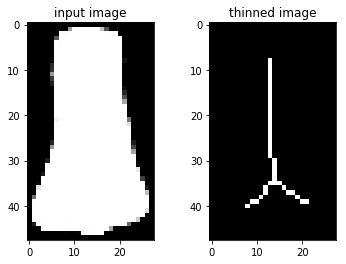

In [100]:
from skimage.morphology import skeletonize, skeletonize_3d
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import io
import skimage.data
import skimage.color
import os

img = cv2.imread('概形シルエット/17Apically/17daruma6o06_l.jpg',0)
img = cv2.resize(img,(int(img.shape[1]/5),int(img.shape[0]/5)))
ret,th2 = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

skeleton = skeletonize(th2)
# 結果を出力します
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("input image")
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title("thinned image")
plt.show()

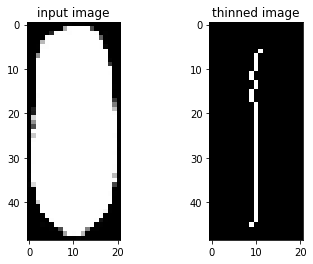

In [92]:
img = cv2.imread('概形シルエット/17Cylindric/17makoto1o06_l.jpg',0)
img = cv2.resize(img,(int(img.shape[1]/5),int(img.shape[0]/5)))
ret,th2 = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

skeleton = skeletonize(th2)
# 結果を出力します
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("input image")
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title("thinned image")
plt.show()

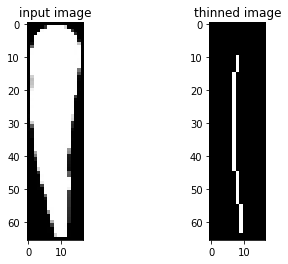

In [93]:
img = cv2.imread('概形シルエット/17Triagular/17horyou1o05_l.jpg',0)
img = cv2.resize(img,(int(img.shape[1]/5),int(img.shape[0]/5)))
ret,th2 = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

skeleton = skeletonize(th2)
# 結果を出力します
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("input image")
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title("thinned image")
plt.show()

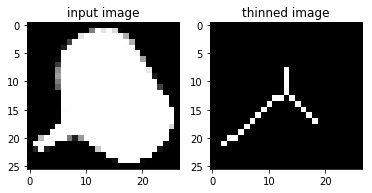

In [95]:
img  = cv2.imread('概形シルエット/17Tran_ellip/17karami2o03_l.jpg',0)
img = cv2.resize(img,(int(img.shape[1]/5),int(img.shape[0]/5)))
ret,th2 = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

skeleton = skeletonize(th2)
# 結果を出力します
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("input image")
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title("thinned image")
plt.show()

In [4]:
# メインプログラム
from skimage.morphology import skeletonize, skeletonize_3d
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import io
import skimage.data
import skimage.color
import os

def batch(images, savedir='スケルトン',normalize=False,interactive = True):
    # savedir 保存先
    # interactive 結果を１枚ずつ確認するかどうか
    
    for path in images:
        print(path)
        
        src = cv2.imread(path,0) # 対象画像の読み込み
        
        if normalize:
            # 処理対象画像を　短辺１２８に正規化する
            height, width = src.shape[:2]
            nlen = width if width < height else height # 縦横の短い方
            shrink = 64/nlen # 縮小率
            src = cv2.resize(src,(int(shrink*width),int(shrink*height)))
        
        # ２値化するとともに、白を１にする
        _ret,img = cv2.threshold(src,127,1,cv2.THRESH_BINARY)
        
        # scikit-learn の高速細線化処理を適用
        skeleton = 255*skeletonize(img)

        # 結果を確認       
        if interactive:
            cv2.imshow(path,mkparaimage(cv2.bitwise_xor(src,img),skeleton))
            key = cv2.waitKey(0)
            cv2.destroyAllWindows()
            cv2.waitKey(1) 
            if key == 113: #  "Q" で終了する
                break

In [5]:
_dir,ffiles = listimage(path='概形シルエット', needThum=False)
batch(sum(ffiles,[]), savedir='スケルトン',interactive = True, normalize=True)

概形シルエット/17Cylindric/17daruma2o05_l.jpg
概形シルエット/17Cylindric/17daruma3o01_l.jpg
概形シルエット/17Cylindric/17daruma3o02_l.jpg
概形シルエット/17Cylindric/17daruma3o03_l.jpg
概形シルエット/17Cylindric/17daruma3o05_l.jpg
概形シルエット/17Cylindric/17daruma3o09_l.jpg
概形シルエット/17Cylindric/17daruma6o09_l.jpg
概形シルエット/17Cylindric/17kohaku1o02_l.jpg
概形シルエット/17Cylindric/17kohaku1o09_l.jpg
概形シルエット/17Cylindric/17kohaku2o10_l.jpg
概形シルエット/17Cylindric/17makoto1o01_l.jpg
概形シルエット/17Cylindric/17makoto1o05_l.jpg
概形シルエット/17Cylindric/17makoto1o06_l.jpg
概形シルエット/17Cylindric/17makoto1o10_l.jpg
概形シルエット/17Cylindric/17makoto2o03_l.jpg
概形シルエット/17Cylindric/17makoto2o06_l.jpg
概形シルエット/17Cylindric/17santar2o09_l.jpg
概形シルエット/17Cylindric/17santar2o10_l.jpg
概形シルエット/17Cylindric/17sinsyt1o08_l.jpg
概形シルエット/17Cylindric/17tanabe1o01_l.jpg
概形シルエット/17Cylindric/17tanabe1o02_l.jpg
概形シルエット/17Cylindric/17tanabe1o05_l.jpg
概形シルエット/17Cylindric/17tanabe1o06_l.jpg
概形シルエット/17Cylindric/17tanabe1o07_l.jpg
概形シルエット/17Cylindric/17tanabe1o09_l.jpg
概形シルエット/17Cylindric/17tan

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import math
import pandas as pd

# この関数は画像の入った複数のフォルダが１つのフォルダに入っていることを前提としている。
#  指定フォルダ直下の画像ファイルは無視する。直下のフォルダの中しか見ず、さらにサブフォルダがあっても再帰的に探すようなことはしない。

def listimage(path='概形シルエット', needThum=False):

    directory = os.listdir(path)
    
    # まずフォルダを全部リストアップ　→ folders
    folders = []
    for x in os.listdir(path):  
        if os.path.isdir(path + '/'+x) and x[0] != '.' and x[0] !='_':  #パスに取り出したオブジェクトを足してフルパスに
            folders.append(path + '/'+x)

    # folders の各フォルダの中にある jpg ファイルをリストアップ → ffiles
    # ffiles はフォルダごとのリストのリスト
    ffiles = []
    for x in folders:
        files = []
        for f in os.listdir(x):
            entry = x + '/'+f
            if os.path.isfile(entry) and f[-4:]=='.jpg' and f[0] != '.':
                files.append(entry)
        ffiles.append(files)
        
    if needThum: # サムネイルの作成
        i = 0
        for cat in ffiles:
            # print(folders[i])
            sam = Image.new('RGB', (800,600),(0,0,0))
            row = col = 0
            for rad in cat:
                img = Image.open(rad, 'r')
                thumbnail_size = (100, 100)
                img.thumbnail(thumbnail_size)
                sam.paste(img,(col,row))
                col += 100
                if col == 800:
                    col = 0
                    row += 100
                # plt.imshow(sam)
            sam.save('{}THUM.png'.format(folders[i]), 'PNG')
            print("saved {}".format(folders[i]))
            i +=1

    return folders,ffiles

# マージンをつける
def makemargin(img):
    h,w = img.shape[:2]
    w2 = 2*w
    h2 = 2*h
    img2 = np.zeros((h2,w2),np.uint8)
    img2[int(h/2):int(h/2)+h,int(w/2):int(w/2)+w] = img
    return img2

# ２枚の画像をサイズを並べた画像を作成する
def mkparaimage(img1,img2):
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]
    if img1.ndim == 2:
        img11 = np.zeros((h1,w1,3))
        img11[:,:,0]=img11[:,:,1]=img11[:,:,2]=img1
    else:
        img11=img1
    if img2.ndim == 2:
        img22 = np.zeros((h2,w2,3))
        img22[:,:,0]=img22[:,:,1]=img22[:,:,2]=img2
    else:
        img22=img2
    paraimg = 255*np.ones((max(h1,h2),w1+w2+10,3),dtype=np.uint8)
    
    paraimg[0:h1,0:w1,:] = img11
    paraimg[0:h2,w1+10:,:]=img22
    
    return paraimg

# mkparaimage で２枚並べた画像を表示
def imshowpara(img1,img2):
    plotimg(mkparaimage(img1,img2))